##Task 1: Dataset Exploration and Preparation

Load the dataset and inspect image classes and distributions


In [6]:
!pip install kaggle

In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"narennandan","key":"bfa9fa4ca9bf7fb02e82ac571ec0dfc5"}'}

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 96% 331M/346M [00:01<00:00, 171MB/s]
100% 346M/346M [00:03<00:00, 91.8MB/s]


In [11]:
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [13]:
data_dir = "seg_train/seg_train"

classes = os.listdir(data_dir)
print("Classes:", classes)

Classes: ['street', 'forest', 'sea', 'glacier', 'buildings', 'mountain']


In [14]:
for c in classes:
    print(c, len(os.listdir(os.path.join(data_dir, c))))

street 2382
forest 2271
sea 2274
glacier 2404
buildings 2191
mountain 2512


In [26]:
import shutil
import random

small_dir = "/content/small_data"
os.makedirs(small_dir, exist_ok=True)

for c in classes:
    os.makedirs(os.path.join(small_dir, c), exist_ok=True)
    images = os.listdir(os.path.join(data_dir, c))

    sample = random.sample(images, 500)  # 🔥 reduce to 500 per class

    for img in sample:
        src = os.path.join(data_dir, c, img)
        dst = os.path.join(small_dir, c, img)
        shutil.copyfile(src, dst)

In [27]:
datagen = ImageDataGenerator(validation_split=0.2)

train_gen = datagen.flow_from_directory(
    small_dir,
    target_size=(150,150),
    batch_size=32,
    subset='training'
)

val_gen = datagen.flow_from_directory(
    small_dir,
    target_size=(150,150),
    batch_size=32,
    subset='validation'
)

Found 2400 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


## Analytical Question 1

Lighting changes can alter pixel intensities makes the pics looks different
different viewpoits can leadts to different shaped and spatial relationships

##Task 2: Data Preprocessing and Augmentation


In [28]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    small_dir,
    target_size=(150,150),
    batch_size=32,
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    small_dir,
    target_size=(150,150),
    batch_size=32,
    subset='validation'
)

Found 2400 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


## Analytical Question 2

It creates variations of existing images

##Task 3: Model Design and Training


In [29]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)

Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.3272 - loss: 1.6020 - val_accuracy: 0.5717 - val_loss: 1.1465
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.5302 - loss: 1.1673 - val_accuracy: 0.5817 - val_loss: 1.0809
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.5640 - loss: 1.1303 - val_accuracy: 0.6267 - val_loss: 1.0192
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.6295 - loss: 1.0085 - val_accuracy: 0.6367 - val_loss: 0.9789
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.5998 - loss: 1.0150 - val_accuracy: 0.6183 - val_loss: 0.9612


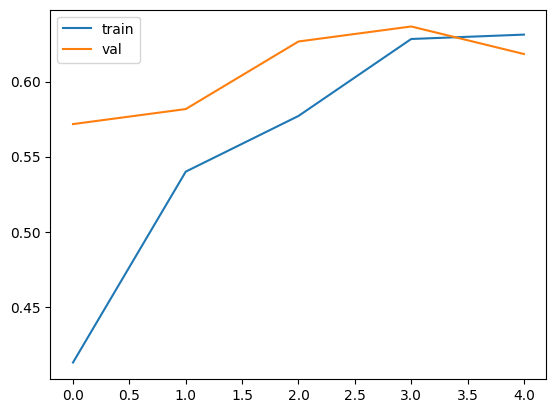

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','val'])
plt.show()

## Task 4: Model Evaluation

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

val_gen.reset()
preds = model.predict(val_gen)
y_pred = np.argmax(preds, axis=1)

print(classification_report(val_gen.classes, y_pred))

19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 608ms/step
              precision    recall  f1-score   support

           0       0.20      0.29      0.24       100
           1       0.24      0.15      0.19       100
           2       0.22      0.33      0.27       100
           3       0.25      0.10      0.14       100
           4       0.12      0.10      0.11       100
           5       0.18      0.23      0.20       100

    accuracy                           0.20       600
   macro avg       0.20      0.20      0.19       600
weighted avg       0.20      0.20      0.19       600



### Analytical Question 4

## Task 5: Error and Failure Analysis

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


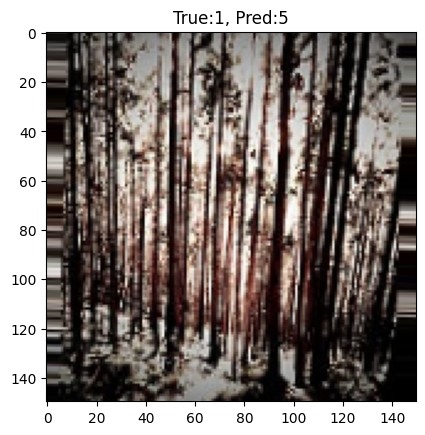

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


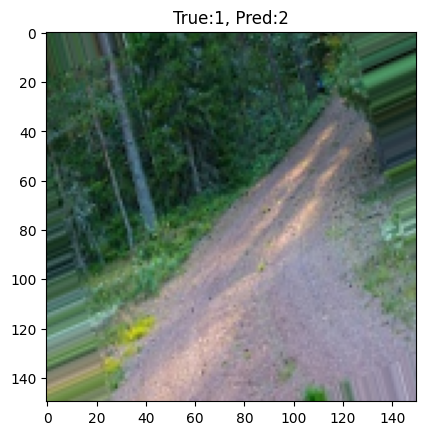

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


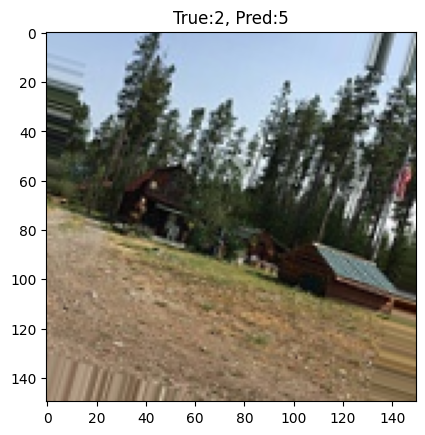

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


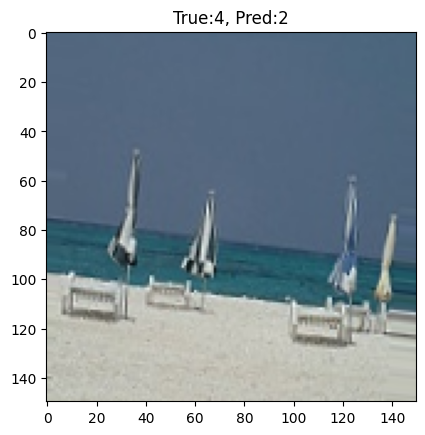

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


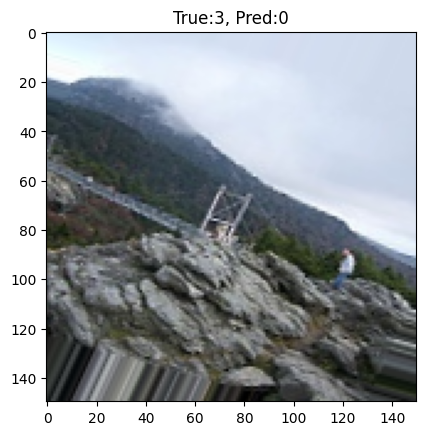

In [32]:
import matplotlib.pyplot as plt

for i in range(5):
    img, label = val_gen[i]
    pred = model.predict(img)

    for j in range(len(img)):
        if np.argmax(pred[j]) != np.argmax(label[j]):
            plt.imshow(img[j])
            plt.title(f"True:{np.argmax(label[j])}, Pred:{np.argmax(pred[j])}")
            plt.show()
            break

## Task 6: Model Refinement

In [33]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(150,150,3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_gen, validation_data=val_gen, epochs=3)

/tmp/ipython-input-351/737342692.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150,150,3),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 80s 983ms/step - accuracy: 0.6520 - loss: 0.9806 - val_accuracy: 0.8500 - val_loss: 0.4162
Epoch 2/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 72s 855ms/step - accuracy: 0.8616 - loss: 0.3554 - val_accuracy: 0.8583 - val_loss: 0.3871
Epoch 3/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 870ms/step - accuracy: 0.8965 - loss: 0.3124 - val_accuracy: 0.8633 - val_loss: 0.3434


## Task 7: Streamlit Deployment

In [ ]:

import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np

model = tf.keras.models.load_model("model.h5")

st.title("Scene Classifier")

file = st.file_uploader("Upload Image")

if file:
    img = Image.open(file).resize((150,150))
    img = np.array(img)/255.0
    img = np.expand_dims(img, axis=0)

    pred = model.predict(img)
    st.write("Prediction:", np.argmax(pred))